In [1]:
from anndata import AnnData
from scipy.stats import pearsonr, spearmanr, wilcoxon

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import squidpy as sq

import os, warnings 
warnings.filterwarnings('ignore') 
import stan

figsize = stan.figsize
fontsize = stan.fontsize
dpi = stan.dpi

In [2]:
opath = 'outputs_cv'
param = [3, 2, 1, 0, -1, -2, -3]

In [3]:
def df_corr_wrapper(sample_id):
    adata_stan = sc.read_h5ad(f"{opath}/adata_{sample_id}.h5ad")
    adata_tfa_list = dict()
    exponents1 = param
    exponents2 = exponents1
    for i in exponents1:
        for j in exponents2:
            key = f'tfa_stan_{i}_{j}'
            adata_tfa_list[key] = stan.get_activity(adata_stan, key=key)
            
    ind_names = [f'1e{i}' for i in exponents1]
    col_names = [f'1e{j}' for j in exponents2]
    n1 = len(ind_names)
    n2 = len(col_names)
    df_corr_stan = pd.DataFrame(index=ind_names, columns=col_names)
    for i in range(n1):
        for j in range(n2):
            df_corr_stan.iloc[i,j] = adata_stan.obs[f'pred_cor_stan_{exponents1[i]}_{exponents2[j]}'].mean()
    return df_corr_stan

In [45]:
def df_corr_plot(df_corr_stan, sample_title):            
    fig, ax = plt.subplots(1, 1, figsize=(figsize*2.4, figsize*2), dpi=dpi)
    plt.rc('font', size=fontsize)
    sns.heatmap(df_corr_stan.astype(float), cmap="Blues", annot=True,
                vmax=1e6, vmin=0., fmt='.4f',
                linewidths=0.8, linecolor='black',
                ax = ax, cbar=False)
    ax.set_ylabel('STAN $\lambda_1$\n(Spatially weighted regularizer)')
    ax.set_xlabel('STAN $\lambda_2$ (Frobenius regularizer)')

    df_corr_stan.columns = pd.to_numeric(df_corr_stan.columns)
    df_corr_stan.index = pd.to_numeric(df_corr_stan.index)

    xticks_pos = [i + 0.5 for i in range(len(df_corr_stan.columns))]
    yticks_pos = [i + 0.5 for i in range(len(df_corr_stan.index))]

    # Convert columns/index to numeric (if needed)
    df_corr_stan.columns = pd.to_numeric(df_corr_stan.columns)
    df_corr_stan.index = pd.to_numeric(df_corr_stan.index)
    
    # Custom formatter to force compact scientific notation (e.g., 1e-3 instead of 1e-03)
    def compact_sci_notation(x):
        s = f"{x:.0e}"  # Convert to scientific notation
        return s.replace("e-0", "e-").replace("e+0", "e")  # Remove leading zero in exponent
    
    # Set ticks at cell centers with compact notation
    ax.set_xticks(
        [i + 0.5 for i in range(len(df_corr_stan.columns))],
        labels=[compact_sci_notation(x) for x in df_corr_stan.columns],
        rotation=0
    )
    ax.set_yticks(
        [i + 0.5 for i in range(len(df_corr_stan.index))],
        labels=[compact_sci_notation(x) for x in df_corr_stan.index],
        rotation=0
    )
    
    plt.suptitle(f'Cross Validation Performance (Pearson r) \n{sample_title}')

## Lymph node

In [5]:
sample_id = "V1_Human_Lymph_Node"
df_corr_ln = df_corr_wrapper(sample_id)

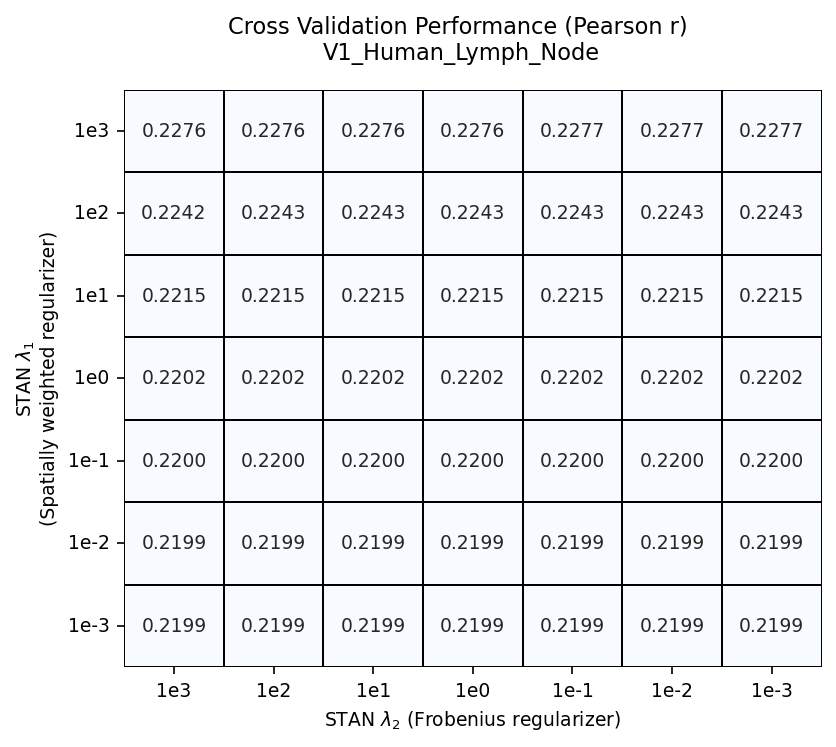

In [46]:
df_corr_plot(df_corr_ln, "V1_Human_Lymph_Node")

## Breast_Wu_CID4535

In [8]:
sample_id = "Breast_Wu_CID4535"
df_corr_er2 = df_corr_wrapper(sample_id)

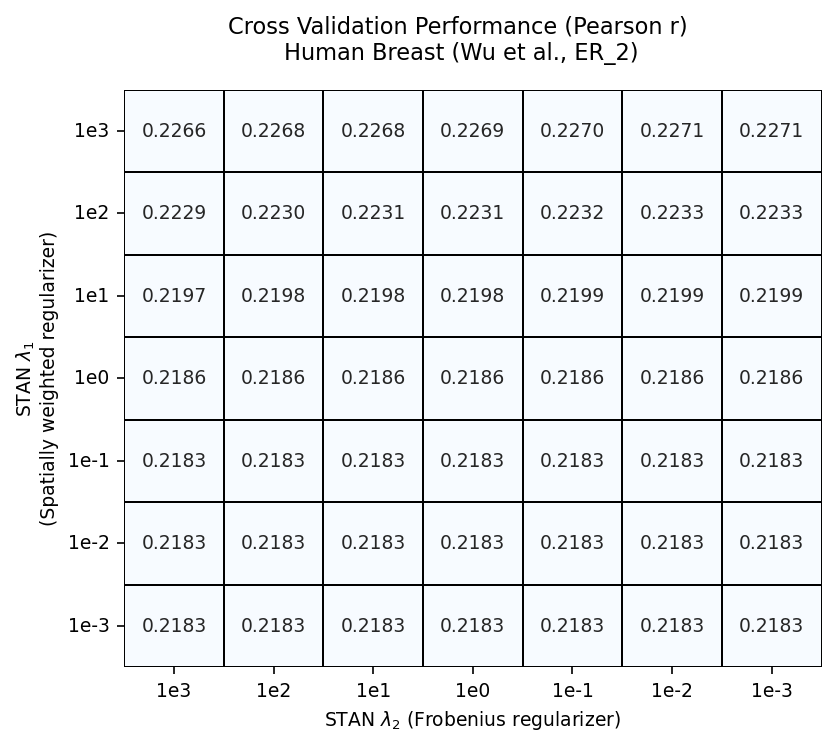

In [47]:
df_corr_plot(df_corr_er2, "Human Breast (Wu et al., ER_2)")

## Breast_Wu_1160920F

In [14]:
sample_id = "Breast_Wu_1160920F"
df_corr_tnbc2 = df_corr_wrapper(sample_id)

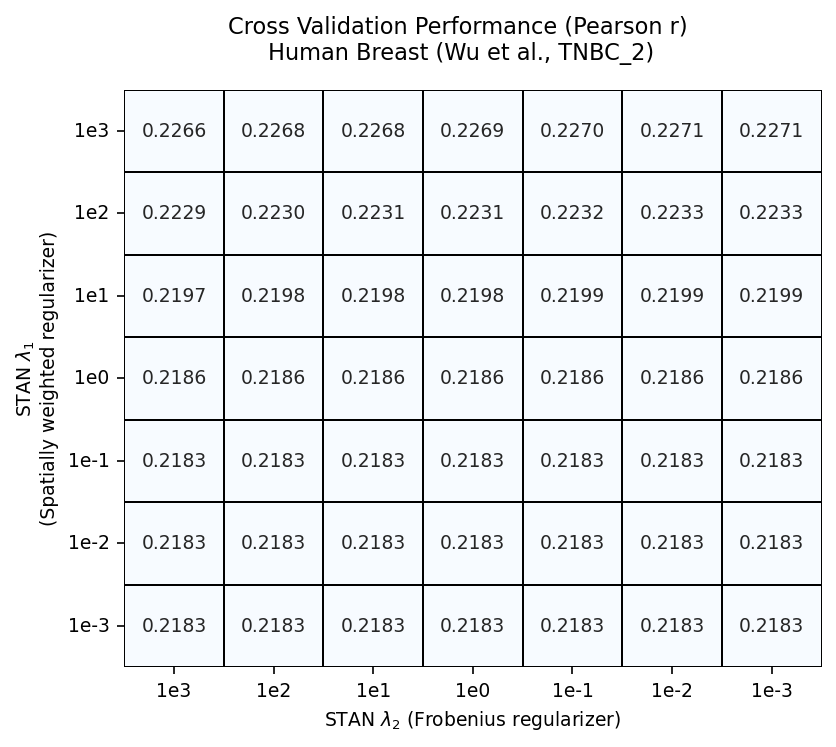

In [48]:
df_corr_plot(df_corr_tnbc2, "Human Breast (Wu et al., TNBC_2)")

## Breast_Wu_CID44971

In [16]:
sample_id = "Breast_Wu_CID44971"
df_corr_tnbc4 = df_corr_wrapper(sample_id)

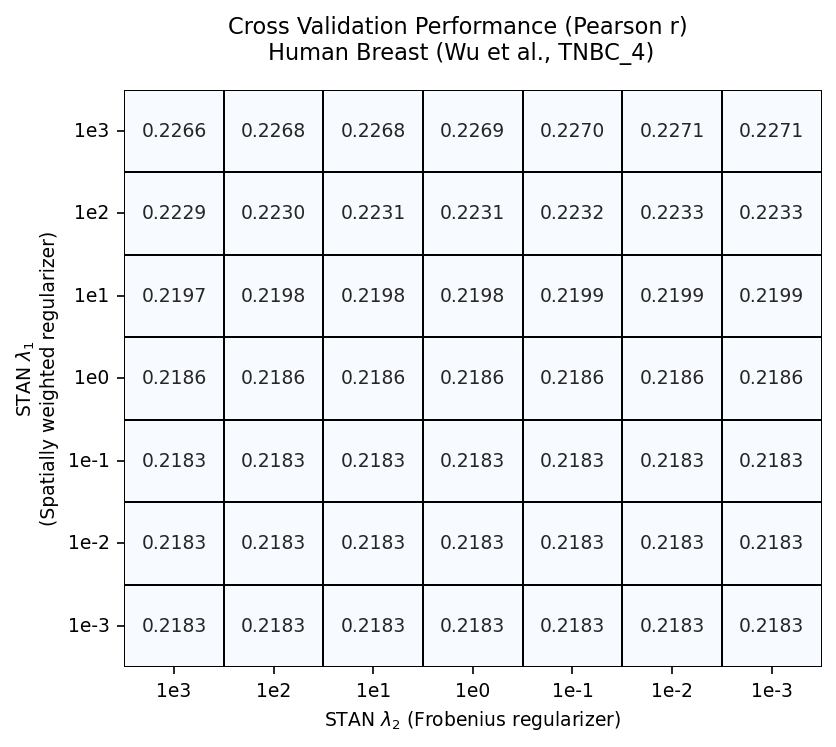

In [49]:
df_corr_plot(df_corr_tnbc2, "Human Breast (Wu et al., TNBC_4)")